<a href="https://colab.research.google.com/github/JuanM-GG/modelos-tesis/blob/main/algoritmos_geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Algortimos genéticos

Nombre: Juan Manuel 

Fecha: 

Los algoritmos genéticos (AGs) fueron inventados por John Holland en la universidad de Michigan en 1970s (2016—ESSENTIALS). Los algoritmos genéticos están basados en los principios de la selección natural. Los elementos básicos de la selección natural – reproducción, cruzamiento y mutación – son usados en el procedimiento (2009—modern methods). Específicamente, los AG simulan los procesos biológicos que permiten a las consecutivas generaciones en una especie adaptarse a su ambiente. El proceso de adaptación es aplicado principalmente a través de la herencia de padres a hijos y a través de la supervivencia de los más aptos. Actualmente, los algoritmos genéticos son considerados como uno de los tipos de metahuerísticas más aplicadas (2004—Studies on metaheuristics).

Los AG comienzan con una población inicial de soluciones. A las soluciones en un población se les llama individuos. En la presentación orginal de los AGs los individuos en la población son representados mediante números binarios. Esta representación suele ser conveniente al momento de implementar los operadores del algoritmo genético. Por lo anterior, en esta sección nos limitamos a explicar el funcionamiento de los algortimos genéticos mediante una representación de individuos en forma de números binarios. No obstante, es importante considerar que actualmente existen versiones de AGs donde se representa a los individuos en la población como variables de valor real. A la representación en forma de número binario de un individuo se le conoce como cromosoma. El cromosoma consiste en un número fijo de bits los cuales son llamados genes. Con el objetivo de evaluar y clasificar cromosomas en una población una función fitness, basada en la función objetivo, debe ser definida. El valor de la función fitness evaluada en un determinado cromosoma se conoce como el fitness de ese cromosoma. Tres operadores deben ser especificados para construir la estructura completa de un algoritmo genético; operadores de selección, cruzamiento y mutación. El operador de selección se encarga de seleccionar una población intermedia (conocida como población de padres) de la población actual con el objetivo de ser usada por los otros operadores de cruzamiento y mutación. En este proceso de selección, los cromosomas con mayor fitness tienen mayor probabilidad de ser seleccionados que aquellos con un valor fitness bajo. Pares de padres en la población intermedia son elegidos aleatoriamente para ser cruzados y generar la descendencia. Con el objetivo de incrementar la variabilidad, el operador de mutación es aplicado para modificar uno o más genes de un cromosoma elegido aleatoriamente.  




1.	Una población de individuos es usada para empezar el proceso en lugar de una sola solución.  Debido a que varias soluciones son usadas, los AGs son menos propensos a quedarse atrapados en óptimos locales

2.	Los AGs usan solo el valor de la función objetivo. Las derivadas no se usan en el proceso de búsqueda

3.	En los AGs las soluciones se representan como cadenas de variables binarias a las que se les llaman cromosomas. Por lo tanto, el método de búsqueda es naturalmente aplicable para resolver problemas de programación discreta y entera. Para obtener soluciones de valor real, una función que convierta las variables binarias en reales debe ser empleada

4.	El valor de la función objetivo evaluada en una solución representa la bondad de esta solución y se le llama el fitness de la solución.  

5.	Una nueva generación de cromosomas se forma a través de la aplicación de tres operadores genéticos; la selección de individuos en la población actual para obtener a los padres (cromosomas que se usan para generar la siguiente generación), cruzamiento de de estos padres para generar hijos (cromosomas obtenidos a través de la combinación de los cromosomas padres) y la mutación de los hijos. A pesar de la aleatorización, los AGs no son simples técnicas de búsqueda aleatorias. Ellos exploran eficientemente las nuevas combinaciones con el conocimiento disponible para encontrar una nueva generación con mejore fitness. 

### Ejemplo para mostrar el funcionamiento de los AGs

Con el objetivo de explicar el funcionamiento de los AGs se mostrará la implenetación de un AG para resolver un problema de optimización relativamente sencillo. 

El problema que se usará como ejemplo es el siguiente.

Maximizar:

$$
f(x) = \text{sen}{\left( \frac{x'}{2^\text{bits}} \right)} \tag{1}
$$

Sujeto a:
$$
x' = \sum_{i=1}^D x_i 2^{i-1} \tag{2}
$$

$$
0 < x' < 250 \tag{3}
$$

donde $x'$ es la versión entera de un número binario $x$ y $\text{bits}$ es el número de bits en este número binario. El rango de búsqueda es de 0 a 250. En este ejemplo se emplean ocho bits para poder cubrir todo el rango de búsqueda, por lo tanto $\text{bits} = 8$.


In [4]:
# número de bits necesarios para cubrir el rango de búsqueda
bits = ceiling(log(250,2))
bits

[1] 8

In [21]:
#@title función para graficar la función objetivo
objetivo_grafica = function(x, bits) {

    f = sin(pi*(as.numeric(x))/(2^bits))

    return(f)
}

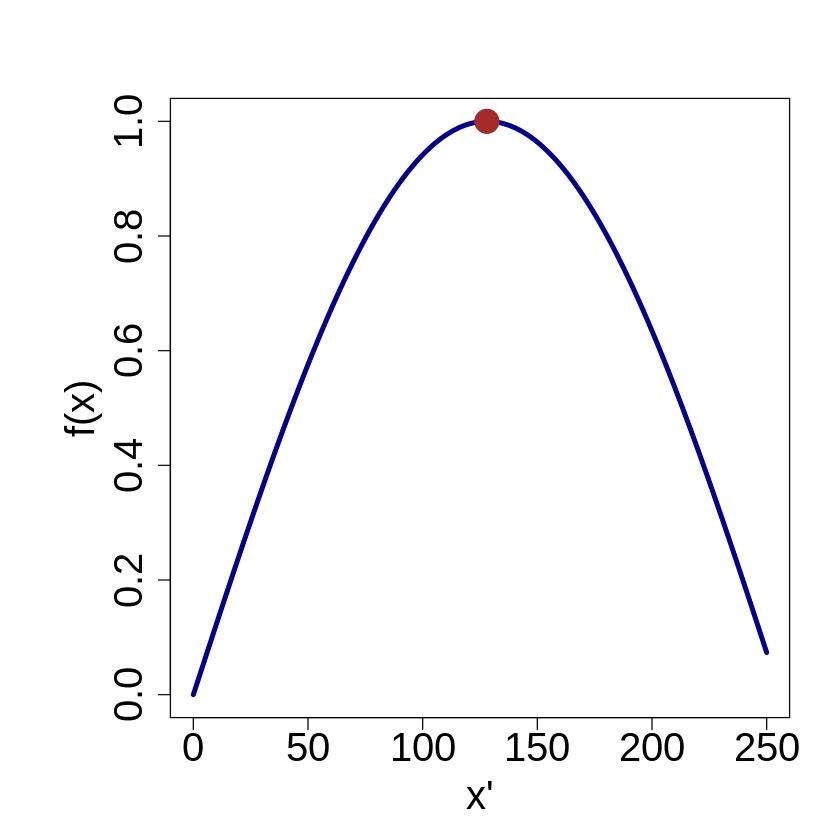

In [22]:
#@title graficar función objetivo
x = seq(0,250,1)
func = objetivo_grafica(x, bits)
par(mar = c(5,7,4,2) + 0.1)
plot(x,func, type = "l", lwd = 4, col = "darkblue", cex.lab = 2, cex.axis = 2, xlab = "x'", ylab = "f(x)")
points(128,1,col = "brown", cex = 4, pch = 20)

Figura 1. Gráfica de la función a optimizar del ejemplo de AGs. Se aprecia que la función es convex en el intervalo de 0 a 150. Aun así, se crea y aplica un AG para obtener el máximo de esta función para mostrar el funcionamiento de los AGs. El óptimo de la función es $x' = 128$ y $f(128) = 1$.

En la Fig. 1 se muestra la gráfica de la función (1). Pese a que esta función es sencilla y obtener su máximo no requiere el uso de AGs se emplea para explicar los conceptos relacionados con la implenentación de AGs. 

### Codificación 

La codificación de las soluciones se refiere a la forma en la que las soluciones en la población son representadas. Existen dos principales tipos de representaciones en un AG. La condificación como números binarios y la codificación como números reales. La codificación binaria fue presentada con la version original de los AGs. La codificación real puede ser necesaria si el problema que se está resolviendo requiere el uso de variables de tipo real. En este último caso es posible programar un algoritmo genético que trabaje completamente con variables reales o emplear una función que permita transformar variables de tipo binario a variables de tipo real.  

Para el ejemplo que se analiza en esta sección se requieren variables enteras para realizar la optimización ya que el óptimo de (1) es $x = (1,0,0,0,0,0,0,0)$, que en su forma entera equivale a $x' = 128$. Por esta razón es necesaria función (2) que permite convertir un número binario en un número entero. 

In [12]:
#@title función para transformar binario en entero
binario_a_entero = function(binario) {

    index = (length(binario)-1):0

    entero = sum(2^{index}*binario)

    return(entero)
}

In [13]:
binario_a_entero(c(1,0,0,0,0,0,0,0))

[1] 128

Una vez que se cuenta con esta función es posible crear una población de individuos representados como números binarios y luego transformarlos para obtener su valor equivalente como números enteros.
Por ejemplo el número binario $x = 01000100$ se transforma a su forma entera para dar 68. En el ejemplo se usan 8 bits para representar cada número binario ya que este número de bits permite representar un valor máximo 255, con lo que se cubre todo el espacio de búsqueda de 0 a 250. 

Tabla 1. Representación como número binario y como número entero de posibles soluciones del problema de optimización del ejemplo 

| número binario | número entero | fitness |
|:---:|:---:|:---:|
| 01000100 | 68 | 0.7409511 |
| 01101101 | 109 | 0.97294 |
| 11101101 | 237 | 0.2310581


In [15]:
bin1 = c(0,1,0,0,0,1,0,0)
sol1 = binario_a_entero(bin1)
print(sol1)
bin2 = c(0,1,1,0,1,1,0,1)
sol2 = binario_a_entero(bin2)
print(sol2)
bin3 = c(1,1,1,0,1,1,0,1)
sol3 = binario_a_entero(bin3)
print(sol3)

[1] 68
[1] 109
[1] 237


In [10]:
# función objetivo
objetivo = function(binario) {

    bits = length(binario)

    entero = binario_a_entero(binario) 

    f = sin(pi*(as.numeric(entero))/(2^bits))

    return(f)

}

In [17]:
fit1 = objetivo(bin1)
print(fit1)
fit1 = objetivo(bin2)
print(fit1)
fit1 = objetivo(bin3)
print(fit1)

[1] 0.7409511
[1] 0.97294
[1] 0.2310581


In [7]:
#@title función para crear individuo 
crear_individuo = function(bits, pool) {

    individuo = sample(pool, bits, replace = TRUE)

    return(individuo)
}

In [8]:
pool = c(0,1)
ind = crear_individuo(bits, pool)
ind

[1] 0 1 0 1 0 1 1 0

In [14]:
# evaluar objetivo 
objetivo(ind)

[1] 0.870087

In [3]:
#@title función para crear población

crear_poblacion = function(N, bits, pool) {
    pop = matrix(nrow = N, ncol = bits)
    for (i in 1:N) {

        pop[i,] = crear_individuo(bits, pool)
    }

    return(pop)
}

In [15]:
N = 4
pop = crear_poblacion(N, bits, pool)
pop

0,1,0,1,1,0,1,0
0,0,0,0,0,0,0,1
1,1,0,1,1,1,1,0
1,1,1,0,0,1,0,1


### Función fitness 

La función fitness es una función que mide que tan buena es una solución. Debe ser establecida de tal forma que una mejor solución tendrá un mayor fitness que peores soluciones.  La función fitness juega un papel fundamental en el proceso de selección. Si se busca maximizar la función objetivo, en algunos casos es posible establecer la función objetivo directamente como la función fitness. Si el problema de optimización busca minimizar la función objetivo, la función fitness tiene que ser planteada de tal forma que el mínimo de la función objetivo corresponda al máximo de la función fitness. Por ejemplo, si se quiere minimizar la función $f(x)$ la función fitness puede ser escrita de la siguiente manera.

$$
\text{fitness}(x) = \frac{1}{1 + f(x)} \tag{5}
$$

De esta manera, el valor $x^{opt}$ que genera el valor máximo de $\text{fitness(x)}$ da lugar al valor mínimo de $f(x)$. El aspecto importante que hay que recrodar es que la mejor solución en el AG tiene que tener el mayor valor de la función fitness. 

In [17]:
# evaluar objetivo 
apply(pop, 1, objetivo)

[1] 0.89322430 0.01227154 0.40524131 0.32531029

In [18]:
obtener_fitness = function(pop) {
    # en este caso la función fitness es igual a la función objetivo 
    fitness = apply(pop, 1, objetivo)

    return(fitness)
}

In [19]:
fitness = obtener_fitness(pop)
fitness

[1] 0.89322430 0.01227154 0.40524131 0.32531029

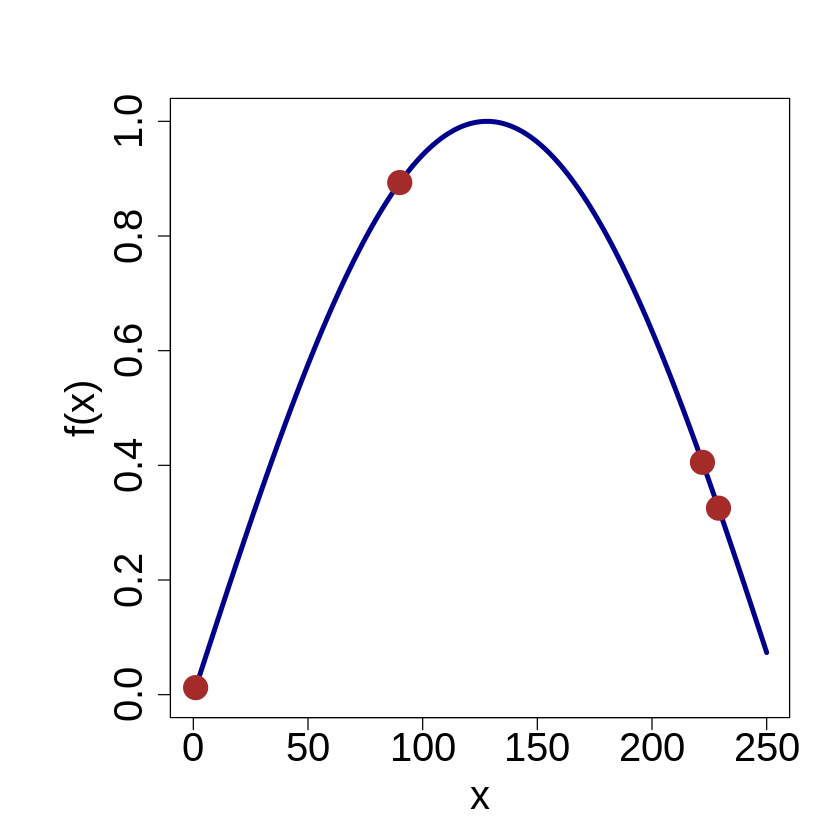

In [23]:
x = seq(0,250,1)
func = objetivo_grafica(x, bits)
par(mar = c(5,7,4,2) + 0.1)
plot(x,func, type = "l", lwd = 4, col = "darkblue", cex.lab = 2, cex.axis = 2, xlab = "x", ylab = "f(x)")
points(apply(pop,1,binario_a_entero), fitness, col = "brown", cex = 4, pch = 20)

### Selección 

La selección es el primer operador aplicado a la población para seleccionar los individuos con valores de fitness altos y formar la población de padres. El operador de selección se usa para escoger individuos por arriba del promedio de la población actual e insertar sus múltiples copias en la población de padres basado en un procedimiento probabilístico (2019--modern). 

#### Selección proporcional 

La selección original con técnica de reemplazo para los GA se denominó selección proporcional al fitness, a veces conocida como selección de ruleta. En este algoritmo, seleccionamos a los individuos en proporción a su fitness: si un individuo tiene un fitness más alto, se selecciona con más frecuencia. Un individuo con un fitness alto tiene mayor probabilidad de tener copias de él en la población de padres (2014--esentials). Por lo tanto, si $\text{fitness}_i$ denota el fitness del individuo $i$ en la población de tamaño $n$, la probabilidad de seleccionar al individuo $i$ para la población de padres está dada por.

$$
p_i = \frac{\text{fitness}_i}{\sum_{j=1}^n\text{fitness}_j} \tag{6}
$$

donde $p_i$ es la probabilidad de seleccionar al individuo $i$.

Nota que (6) implica que la suma de las probabilidades de los individuos es 1. La implementación del proceso de selección dado por (6) se puede entender si se imagina una rueda de ruleta con su circunferencia dividida en segmentos, uno para cada individuo de la población, con las áreas de los segmentos proporcionales al fitness de los individuos.  Si se gira la rueda de ruleta $n$ veces ($n$ siendo el tamaño de la población) y seleccionando, cada vez, el individuo elegido por el apuntador de la rueda de ruleta, obtenemos una población de padres de tamaño $n$. 

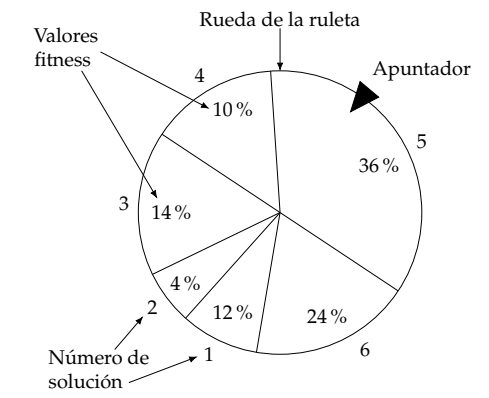

Figura 2. Esquema de selección proporcional. Cada individuo en la población tiene un espacio en la ruleta que es proporcional a su fitness. Por lo tanto, los individuos con un valor fitness alto tienen mayor probabilidad de ser seleccionados.  

In [1]:
seleccion_proporcional = function(pop, fitness, N, bits) {
    # matriz para guardar los padres
    padres = matrix(nrow = N, ncol = bits)
    # calcular probabilidad
    prob = fitness/sum(fitness)
    # calcular probabilidad acumulada 
    prob_acum = prob
    for (i in 2:N) {
        prob_acum[i] = prob_acum[i] + prob_acum[i-1]
    }
    for (i in 1:N) {
        rand = runif(1,0,1)
        min = 0
        for (j in 1:length(prob_acum)) {
            if (rand > min & rand < prob_acum[j]) {
                padres[i,] = pop[j,]
                break
            }
            min = prob_acum[j]
        }
    }
    return(padres)
} 

Algoritmo para la implementación de la selección proporcional. La función que realiza la selección recibe cuatro argumentos. El primer argumento es una matriz llamada $\text{pop}$ que contiene a la población de individuos. En esta matriz cada renglón contiene a un indiviuo (número binario) y cada columna contiene un bit de estos individuos. Por lo tanto, si la población está compuesta por $N$ individuos con un número de bits igual a $\text{bits}$, la matriz $\text{pop}$ tendrá $N$ renglones y $\text{bits}$ número de renglones. El segundo argumento es un vector con el valor fitness de cada individuo en la población. El tercer argumento $N$ es el número de individuos en la población y último argumento $\text{bits}$ es el número de bits de cada individuo en la población. El primer paso en el algoritmo es crear una matriz llamada $\text{padres}$ con las mismas dimensiones que la matriz $pop$ donde se guardarán a las copias de los individuos seleccionados (renglón 2). Usando la ecuación (3) se obtiene la probabilidad se selección de cada individuo, $p(i)$, (renglón 4). Las probabilidades son usadas para calcular la probabilidad acumulada de cada individuo $p_a(i)$, mediante la adición de las probabilidades del individuo 1 hasta el individuo $i$ (renglón 6 - renglón 8). Note que el último individuo en la población tendrá una probabilidad acumulada $p_a(n)$ igual a 1. Para la selección de los $n$ individuos que formarán parte de la población de padres se realizan los siguientes pasos $n$ número de veces (renglón 10 - renglón 15). 

1. Se genera un valor aleatorio entre 0 y 1 llamdo $\text{rand}$

2. Se asocia el rango de probabilidad acumulada $p_a(i-1) - p_a(i)$ con el individuo $i$ en la población. 

3. Comenzando con el primer individuo en la población, se determina si $\text{rand}$ se encuentra dentro del rango de probabilidad acumulada del individuo $i$. De ser así, se escoge este indiviuo, de lo contrario, se procede a realizar la prueba con el siguiente individuo en la población hasta que un individuo es escogido. 

Una vez que se han escogido $n$ copias de los individuo en la población $\text{pop}$ para llenar la población de padres $\text{padres}$ el algoritmo regresa la población de padres (renglón 20).

Mediante este procedimiento, el individuo con el mayor valor fitness será seleccionado más frecuentemente a la población de padres debido a su mayor rango de probabilidad acumulada. Por esta razón, cadenas con altos valores fitness en la población probabilísticamente obtienen más copias en la población de padres. Es importante notar que no se forman nuevos individuos durante la etapa de selección, solo se copian las cadenas existentes en la población a la población de padres. La etapa de selección garantiza que individuos con altos valores fitness sobrevivan y se reproduzcan, e individuos menos aptos mueran. 


In [24]:
N = 4
bits = 8
seleccion_proporcional(pop, fitness, N, bits)

1,1,1,0,0,1,0,1
0,1,0,1,1,0,1,0
1,1,0,1,1,1,1,0
0,1,0,1,1,0,1,0


#### Selección de torneo

Existe algunos problemas con el método de selección proporcional. Ese método supone que el valor fitness de un individuo realmente significa algo importante. Pero a menudo se elige una función fitness tal que los valores grandes sean "mejores" que los más pequeños, y no se pretende implicar nada más (2016--essentials). Además, si un individuo posee un valor fitness bastante superior al resto, existe la posibilidad de que varias copias de este individuo sean insertadas en la población de padres, con lo cual se reduce rápidamente la diversidad  y se podría converger a un mínimo local. 

En la selección de torneo una muestra de $t$ individuos es tomada aleatoriamente de la población. Ellos pueden ser tomados de la población con o sin remplazo. Esta muestra toma parte en un torneo. En este torneo los individuos en la muestra compiten para selecciónar el individuo que formará parte de la población de padres. El individuo ganador es el que posee mayor fitness. El proceso se repite $N$ veces para completar la población de padres. A menudo, el torneo se realiza con dos individuos (torneo binario). Sin embargo, esto puede ser generalizado a un número arbitrario de tamaño $t$ llamado tamaño del torneo (1997--a comparison).

La selección de torneo puede además ajustar la presión de selección para adaptarse a diferentes problemas. La presión de selección se incrementa (disminuye) mediante el incremento (disminución) del tamaño de torneo $t$. Si el tamaño de torneo es grande, los individuos débiles (menor fitness) tienen una pequeña probabilidad de ser seleccionados, debido a que si un individuo débil se encuentra en una muestra grande de individuos hay mayor probabilidad de que exsitan individuos más fuertes (mayor fitness).  Cuando el tamaño de torneo es 1 el proceso de selección es equivalente a la selección aleatoria, en cambio, cuando el tamaño del torneo es considerablemente superior al tamaño de la población, existe una gran probabilidad de elegir al mejor individuo en la población cada vez, con lo que la selección se vuelve determinista (1995--Genetic). Un aspecto interesante de este método de selección es que, siempre que podamos comparar dos individuos cualesquiera y determinar cuál de ellos es mejor, no se necesita el valor real de la función fitness (Hands on GA with Python). 


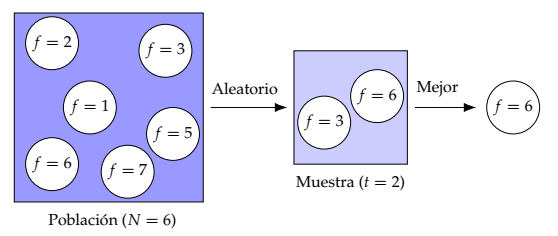

Figura 3. Esquema de selección de torneo. En una población de $N$ individuos se toma una muestra de individuos de tamaño $t$. Se escoge el individuo con mayor fitness en esta muestra para fromar parte de la población de padres. el proceso se repite $N$ número de veces para completar la población de padres.   

In [26]:
selection_torneo = function(pop, t, N, bits) {
    # matrix para guardar los padres seleccionados 
    padres = matrix(nrow = N, ncol = bits)
    # el ciclo se realiza tantas veces como padres deben ser seleccionados
    for (i in 1:N) {
        # tomar una muestra de la población
        indices = sample(1:N, t, replace = F)
        individuos = pop[indices, ]
        # obtener el fitness de los individuos en la muestra
        fitness = apply(individuos, 1, objetivo)
        # seleccionar al ganador
        ganador = which.max(fitness)
        # introducri el individuo ganador en la población de padres
        padres[i,] = individuos[ganador,]
    }
    return(padres)
}

Algortimo 3. Selección de torneo. La función que realiza la selección recibe cuatro argumentos. El primer argumento es la población de individuos $\text{pop}$ de donde se seleccionaran los padres. El segundo argumento es el tamaño de la muestra de individuos $t$ que se toma de la población para realizar el torneo. El tercer argumento es el número de individuos $N$ en la población y el último argumento es el número de bits $\text{bits}$ en cada individuo en la población.  El primer paso en el algoritmo es crear una matriz llamada  $\text{padres}$  con las mismas dimensiones que la matriz  $\text{pop}$  donde se guardarán a las copias de los individuos seleccionados (renglón 2). Posteriormente, los siguientes pasos se repiten $N$ número de veces. 

1. Se toma una muestra sin remplazo de $t$ individuos de la población (renglón 6 - renglón 7)

2. Se calcula el valor fitness de los individuos en la muestra (renglón 9)

3. Se determina quién es el individuo ganador, es decir, qué individuo posee el mayor fitness (renglón 11)

4. Se inserta el individuo ganador en la población de padres (renglón 13)

Una vez que la población de padres ha sido completada el algoritmo regresa la población de padres (renglón 15). 

In [27]:
t = 2
selection_torneo(pop, t, N, bits)

0,1,0,1,1,0,1,0
1,1,0,1,1,1,1,0
1,1,0,1,1,1,1,0
0,1,0,1,1,0,1,0


## Cruzamiento

Después de la selección, el operador de cruce es aplicado sobre la población de padres. El propósito del cruzamiento es crear nuevos individuos mediante el intercambio de información entre individuos en la población de padres. En la mayoría de los operadores de cruce, dos individuos son escogidos de la población de padres y algunas partes de estos individuos son intercambiadas para generar nuevos individuos a los que se les denomina hijos (2009-modern). El cruce de dos individuos padres para generar dos individuos hijos no siempre da lugar a mejores individuos en términos de su valor fitness. Por esta razón, es conveniente preservar algunos individuos padres como parte de la población en la próxima generación.  El cruzamiento se aplica a pares de padres con una probabilidad $pc$ que suele estar entre 0.6 y 0.8. El operador de cruce juega el papel principal en los AGs, así que definir un operador de cruce adecuado es altamente necesario para lograr un buen resultado del AG (2004-studies).

Debido a que el operador de cruce combina partes de los individuos padres (los cuales han sido escogidos por tener valores fitness altos) se espera que los individuos hijos resultantes tengan mejores valores fitness siempre que un sitio de cruce adecuado ha sido seleccionado. Sin embargo, el sitio de cruce se escoge de froma aleatoria. Los individuos hijos generados usando el sitio de cruce aleatorio podrían o no ser tan buenos o mejores que sus individuos padres en términos del valor fitness. Si ellos son tan buenos o mejores que sus padres contribuirán a un rápido mejoramiento en el promedio del valor fitness de la nueva población. Por otro lado, si los individuos hijos creados son peores que sus padres, no sobrevivirán por muchas iteraciones debido a que son menos suceptibles a ser seleccionados en la siguiente etapa de selección (2009-modern)

#### Cruce de un solo punto 

En el método de cruce de un solo punto se elige un sitio de cruce para dividir dos individuos padres en dos partes. Las partes que se obtiene son intercambiadas entre los individuos para generar dos nuevos individuos hijos (2016--essentials). 

En el ejemplo de esta sección donde los individuos están representados como números binarios, un sitio de cruce es seleccionado a lo largo de la longitud de los números binarios. Una vez que se establece el sitio de cruce, los bits de los números binarios padres de cada lado del sitio de cruce son intercambiados para generar nuevos números binarios hijos. 

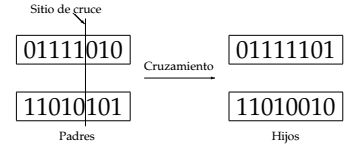

Figura 4. Esquema de cruzamiento de un solo punto. Se escoge un sitio en la cadana de bits y se intercambian las partes de los padres en ambos lados del sitio para generar don hijos. 

In [29]:
cruzamiento_un_punto = function(pop, pc, N, bits) {
    # matriz para guardar a los hijos generados
    hijos = matrix(nrow = N, ncol = bits)
    # iterar por N/2 número de veces para tomar pares de padres y generar pares de hijos
    for (i in 1:(N/2)) {
        # selecciona dos padres en la población
        p1 = pop[2*i-1, ]
        p2 = pop[2*i, ]
        # determinar si se lleva o no el cruce de los padres seleccionados de manera aleatoria
        rand = runif(1,0,1)
        if (rand < pc) {
            # seleccionar el sitio de cruce de manera aleatoria
            sc = sample(2:(bits-1), 1)
            # obtener las partes de los padres que serán intercambiadas
            p11 = p1[1:sc]
            p12 = p1[(sc+1):bits]   
            p21 = p2[1:sc]
            p22 = p2[(sc+1):bits]
            # generar dos indiviuos hijos con las partes de los padres
            c1 = c(p11,p22)
            c2 = c(p21,p12)
            # insertar los dos hijos generados en la población de hijos
            hijos[2*i-1, ] = c1
            hijos[2*i, ] = c2
        }
        else {
            # si no se realiza el cruzamiento introducir los padres a la población de hijos sin modificación
            hijos[2*i-1, ] = p1
            hijos[2*i, ] = p2
        }
    }
    # regresar a la población de hijos
    return(hijos)
}

Algoritmo para la implementación del cruzamiento de un punto. La función que realiza el cruzamiento recibe cuatro argumentos. El primer argumento es una matriz $\text{pop}$ que contiene a la población de individuos. El segundo argumento es la probabilidad de que se realice el cruzamiento $pc$. El tercer argumento es el número de individuos en la población $N$ y último argumento es el número de bits de cada individuo en la población $\text{bits}$. El primer paso es crear una matriz llamada $\text{hijos}$ donde se guardan los hijos generados enla etapa de cruce. Naturalmente, las dimensiones de esta matriz deben ser las mismas que las de $\text{pop}$. Luego se realizan los siguientes pasos por un $N/2$ número de veces. 

1. Se seleccionan dos individuos padres de la población de padres (renglón 6 - renglón 7)

2. Se genera un número aleatorio entre 0 y 1 (renglón 9)

3. Si el número aleatorio generado en el paso 2 es menor que $p_c$ se realizan los pasos 4 a 7, de lo contrario se lleva a cabo el paso 8

4. Se escoge un sitio en la cadena de bits para realizar el cruce entre los padres seleccionados (renglón 12)

5. Se separa cada individuo padre en dos partes divididas por el sitio de cruce (renglón 14 - renglón 19)

6. Se toman las partes de los padres del paso 5, se intercambian y se generan para generar dos individuos hijos (renglón 19 - renglón 20)

7. Se insertan los dos individuos hijos generados en la población de hijos (renglón 22 - renglón 25)

8 En caso de que no se realice el cruzamiento, se insertan los dos padres seleccinados en la población de hijos sin sufrir ningún cambio

Una vez que la población de hijos ha sido completada el algoritmo regresa la población de hijos.


In [30]:
pc = 0.8
cruzamiento_un_punto(pop, pc, N, bits)

0,1,0,0,0,0,0,1
0,0,0,1,1,0,1,0
1,1,0,1,0,1,0,1
1,1,1,0,1,1,1,0


### Cruzamiento uniforme 

El problema con el cruzamiento de un solo punto reside en la posible vinculación entre los elementos de un individuo. Nota como la probabilidad de separar el primer y el último elemento en un individuo es alta mediante el cruzamiento de un solo punto, ya que casi cualquier sitio de cruce logrará esto. De manera similar, la probabilidad de separar dos elementos consecutivos es baja, ya que se requiere un sitio específico de cruce para lograr esto.  Si la organización del individuo es tal que los elementos en los extremos deben trabajar juntos en tándem con el objetivo de alcanzar un valor fitness alto, se estaría rompiendo constantemente buenos pares de individuos que se generan en la búsqueda. 
Es posible tratar a todos los elementos en un individuo de forma justa con respecto a la vinculación a través de realizar el cruzamiento en cada posición de forma independiente de las demás posiciones. En el cruzamiento uniforme se recorren los elementos en un par de individuos padres y se realiza un intercambio de los elementos entre los padres con una determinada probabilidad. 


In [36]:
cruzamiento_uniforme = function(pop, pc, N, bits) {
    # crear una matriz para guarda a los hijos generados
    hijos = matrix(nrow = N, ncol = bits)
    # realizar N/2 iteraciones para obtener a la población de hijos
    for (i in 1:(N/2)) {
        # tomar dos padres de la población de padres para realizar el cruce
        p1 = pop[2*i-1, ]
        p2 = pop[2*i, ]
        # recorrer cada posición en las cadenas de los padres
        for (j in 1:bits) {
            # determinar si la posición j de cada hijo será igual a la de su padre o será intercambiada
            rand = runif(1,0,1)
            if (rand < pc) {
                aux = c1[j]
                p1[j] = c2[j]
                p2[j] = aux
            }
        }
        # generar hijos a partir de los padres con las posiciones intercambiadas
        c1 = p1
        c2 = p2
        # insertar los hijos generados en la población de padres 
        hijos[2*i-1, ] = c1
        hijos[2*i, ] = c2
    }
    return(hijos)
}

Algoritmo para la implementación del cruzamiento uniforme. La función que realiza el cruzamiento recibe cuatro argumentos. El primer argumento es una matriz $\text{pop}$ que contiene a la población de individuos. El segundo argumento es la probabilidad de que se realice el cruzamiento $pc$. El tercer argumento es el número de individuos en la población $N$ y último argumento es el número de bits de cada individuo en la población $\text{bits}$. El primer paso es crear una matriz llamada $\text{hijos}$ donde se guardan los hijos generados en la etapa de cruce. Naturalmente, las dimensiones de esta matriz deben ser las mismas que las de $\text{pop}$. Luego se realizan los siguientes pasos por un $N/2$ número de veces. 

1. Se seleccionan dos individuos padres de la población de padres (renglón 6 - renglón 7)

2. Se recorren las cadenas de los padres y en cada posición se realizan los pasos 3 y 4 (renglón 9)

3. Se genera un número aleatorio entre 0 y 1 (renglón 11)

4. Si el número aleatorio generado en el paso 3 es menor que $p_c$ se intercambian los bits en la posición actual de los padres (renglón 12 - renglón 15)

5. Se utilizan los dos padres con posiciones intercambiadas para generar dos hijos (renglón 19 - renglón 20) 

7. Se insertan los dos individuos hijos generados en la población de hijos (renglón 22 - renglón 25)

Una vez que la población de hijos ha sido completada el algoritmo regresa la población de hijos.


In [42]:
cruzamiento_uniforme(pop, pc, N, bits)

0,1,0,0,0,0,0,1
0,0,0,1,1,0,1,0
1,1,1,0,0,1,0,1
1,1,0,1,1,1,1,0


In [41]:
pop

0,1,0,1,1,0,1,0
0,0,0,0,0,0,0,1
1,1,0,1,1,1,1,0
1,1,1,0,0,1,0,1


### Mutación 



In [36]:
mutacion_un_punto = function(pop, pm) {

    hijos = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:nrow(pop)) {

        hijo = pop[i, ]

        rand = runif(1,0,1)
        if (rand < pm) {
            mut = sample(1:ncol(pop),1)
            bit = pop[mut]
            hijo[mut] = ifelse(bit == 0, 1, 0)
            hijos[i, ] = hijo 
        }
        else {
            hijos[i, ] = hijo
        }
    }

    return(hijos) 
}

In [37]:
pm = 0.5
mutacion_un_punto(pop,pm)

0,0,0,0,1,0,1,0
0,0,1,0,1,1,1,1
0,0,1,1,1,0,1,0
1,0,1,1,1,0,1,0


In [38]:
pop

1,0,0,0,1,0,1,0
0,0,1,0,1,1,1,0
0,0,1,1,1,0,1,0
1,0,1,1,0,0,1,0


In [39]:
mutacion_uniforme = function(pop, pm) {

    hijos = matrix(nrow = nrow(pop), ncol = ncol(pop))

    for (i in 1:nrow(pop)) {

        for (j in 1:ncol(pop)) {

            rand = runif(1,0,1)
            if (rand < pm) {

                bit = pop[i,j]
                hijos[i,j] = ifelse(bit == 0, 1, 0)
            }
            else {
                
                hijos[i,j] = pop[i,j]
            }
        }
    }
    return(hijos)
}

In [40]:
mutacion_uniforme(pop, pm)

0,1,1,1,1,1,0,0
1,1,1,1,0,0,0,1
0,1,0,0,1,0,0,0
0,1,1,1,0,1,0,1


In [41]:
algoritmo_genetico = function(num_ind, generaciones, bits, pc, pm) {

    # crear nueva población
    pop = crear_poblacion(num_ind, bits, pool)

    # obtener fitness 
    fitness = obtener_fitness(pop)

    # guardar registro de mejor solución actual 
    mejor_ind = numeric(length = generaciones)
    indice = which.max(fitness)
    mejor_ind[1] = binario_a_entero(pop[indice, ])
    mejor_fitness = numeric(length = generaciones)
    mejor_fitness[1] = fitness[indice]

    # operadores genéticos
    for (i in 2:generaciones) {

        # seleccionar los padres que se cruzarán 
        padres = seleccion_proporcional(pop, fitness)

        # cruzar padres para generar hijos
        hijos = cruzamiento_un_punto(padres, pc)

        # mutar hijos
        hijos = mutacion_un_punto(hijos, pm)

        # actualizar población
        pop = hijos

        # obtener fitness 
        fitness = obtener_fitness(pop)

        # guardar registro de mejor solución actual 
        indice = which.max(fitness)
        mejor_ind[i] = binario_a_entero(pop[indice, ])
        mejor_fitness[i] = fitness[indice]

    }

    return(list(mejor_ind = mejor_ind, mejor_fitness = mejor_fitness))
}

In [42]:
num_ind = 10
generaciones = 30
bits = bits
pc = 0.5
pm = 0.2
sol = algoritmo_genetico(num_ind, generaciones, bits, pc, pm)

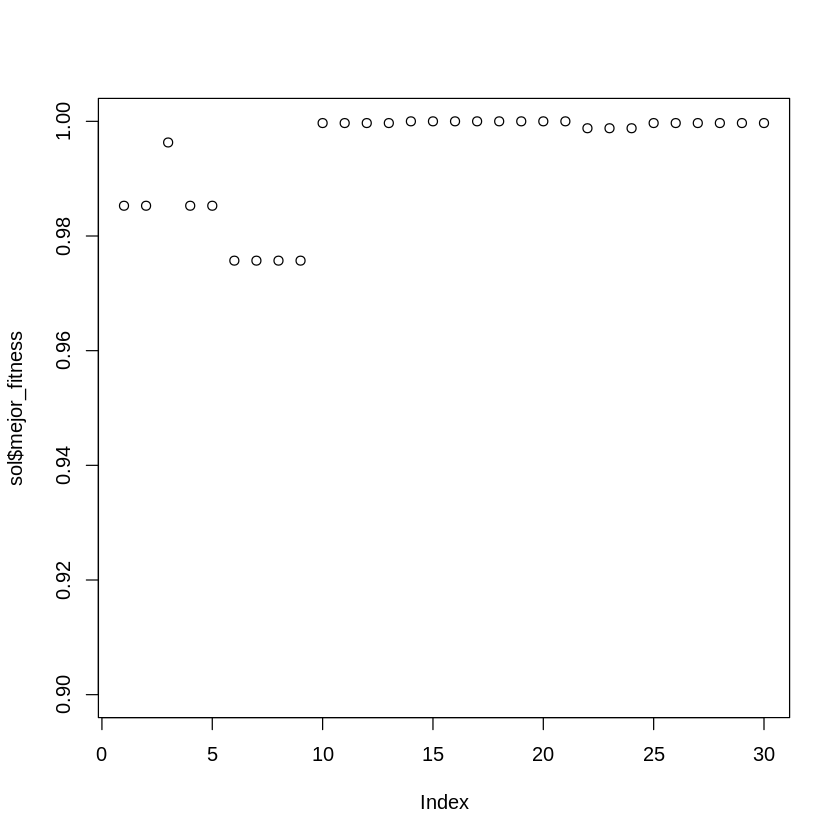

In [43]:
plot(sol$mejor_fitness, ylim = c(0.90,1))

In [44]:
sol$mejor_fitness

[1] 0.9852776 0.9852776 0.9963126 0.9852776 0.9852776 0.9757021 0.9757021
 [8] 0.9757021 0.9757021 0.9996988 0.9996988 0.9996988 0.9996988 1.0000000
[15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[22] 0.9987955 0.9987955 0.9987955 0.9996988 0.9996988 0.9996988 0.9996988
[29] 0.9996988 0.9996988